<a href="https://colab.research.google.com/github/santule/ERA/blob/main/S10/session10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch_lr_finder
!pip install torchsummary

In [1]:
! git clone https://github.com/santule/ERA.git

fatal: destination path 'ERA' already exists and is not an empty directory.


In [2]:
import ERA.S10.utils as utils
import ERA.S10.custom_resnet as custom_resnet
import ERA.S10.dataloader as dataloader

In [3]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch_lr_finder import LRFinder
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.optim.lr_scheduler import OneCycleLR
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn.functional as F
from torchsummary import summary

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### 1 - Load the data

In [4]:
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
train_loader,test_loader = dataloader.load_dataset()

CUDA Available? True


100%|██████████| 170498071/170498071 [00:10<00:00, 15628093.14it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### 2 - Check images

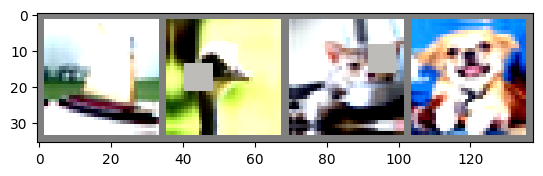

ship  bird  cat   dog  


In [5]:
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# show images
utils.imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

### 3 - load the model and print

In [10]:
model_check = custom_resnet.Net().to(device)
utils.summarise_model(model_check)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

### 4 - Find the max LR

  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 5.38E-02


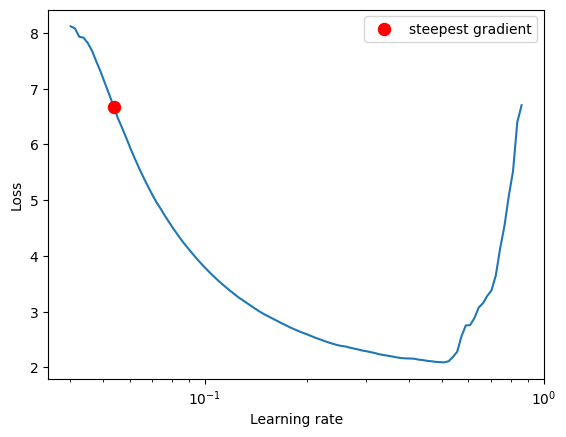

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_check.parameters(), lr=0.03, weight_decay=1e-4)
lr_finder = LRFinder(model_check, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=10, num_iter=200,step_mode='exp')
lr_finder.plot()  # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

### 5 - Train the model

In [12]:
EPOCHS = 24
scheduler = OneCycleLR(optimizer,
                       max_lr = 5.38E-02,
                       pct_start = 5/EPOCHS,
                       div_factor = 100,
                       epochs=EPOCHS,
                       steps_per_epoch=len(train_loader),
                       verbose = False,three_phase=False)
                       #final_div_factor= 100,anneal_strategy='linear')


for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    utils.train(model_check, device, train_loader, optimizer, epoch,criterion,scheduler)
    utils.test(model_check, device, test_loader,criterion)

EPOCH: 0


Loss=0.921305775642395 Batch_id=97 Accuracy=52.61: 100%|██████████| 98/98 [00:19<00:00,  5.15it/s]



Test set: Average loss: 0.0021, Accuracy: 6540/10000 (65.40%)

EPOCH: 1


Loss=0.9746187329292297 Batch_id=97 Accuracy=67.61: 100%|██████████| 98/98 [00:19<00:00,  5.11it/s]



Test set: Average loss: 0.0020, Accuracy: 6639/10000 (66.39%)

EPOCH: 2


Loss=0.7503858804702759 Batch_id=97 Accuracy=72.96: 100%|██████████| 98/98 [00:19<00:00,  5.14it/s]



Test set: Average loss: 0.0020, Accuracy: 6477/10000 (64.77%)

EPOCH: 3


Loss=0.5634858012199402 Batch_id=97 Accuracy=75.34: 100%|██████████| 98/98 [00:18<00:00,  5.18it/s]



Test set: Average loss: 0.0019, Accuracy: 6578/10000 (65.78%)

EPOCH: 4


Loss=0.6865881085395813 Batch_id=97 Accuracy=76.92: 100%|██████████| 98/98 [00:18<00:00,  5.18it/s]



Test set: Average loss: 0.0015, Accuracy: 7551/10000 (75.51%)

EPOCH: 5


Loss=0.6960182785987854 Batch_id=97 Accuracy=76.66: 100%|██████████| 98/98 [00:18<00:00,  5.17it/s]



Test set: Average loss: 0.0017, Accuracy: 7164/10000 (71.64%)

EPOCH: 6


Loss=0.6387544274330139 Batch_id=97 Accuracy=77.82: 100%|██████████| 98/98 [00:18<00:00,  5.19it/s]



Test set: Average loss: 0.0021, Accuracy: 6713/10000 (67.13%)

EPOCH: 7


Loss=0.6663752794265747 Batch_id=97 Accuracy=77.99: 100%|██████████| 98/98 [00:18<00:00,  5.19it/s]



Test set: Average loss: 0.0018, Accuracy: 7118/10000 (71.18%)

EPOCH: 8


Loss=0.5242325067520142 Batch_id=97 Accuracy=78.46: 100%|██████████| 98/98 [00:18<00:00,  5.22it/s]



Test set: Average loss: 0.0016, Accuracy: 7333/10000 (73.33%)

EPOCH: 9


Loss=0.7313488125801086 Batch_id=97 Accuracy=78.75: 100%|██████████| 98/98 [00:18<00:00,  5.22it/s]



Test set: Average loss: 0.0016, Accuracy: 7163/10000 (71.63%)

EPOCH: 10


Loss=0.5704814195632935 Batch_id=97 Accuracy=78.95: 100%|██████████| 98/98 [00:18<00:00,  5.22it/s]



Test set: Average loss: 0.0016, Accuracy: 7360/10000 (73.60%)

EPOCH: 11


Loss=0.6554431319236755 Batch_id=97 Accuracy=79.17: 100%|██████████| 98/98 [00:18<00:00,  5.24it/s]



Test set: Average loss: 0.0013, Accuracy: 7796/10000 (77.96%)

EPOCH: 12


Loss=0.6097009778022766 Batch_id=97 Accuracy=80.38: 100%|██████████| 98/98 [00:18<00:00,  5.23it/s]



Test set: Average loss: 0.0016, Accuracy: 7400/10000 (74.00%)

EPOCH: 13


Loss=0.5214026570320129 Batch_id=97 Accuracy=80.69: 100%|██████████| 98/98 [00:18<00:00,  5.23it/s]



Test set: Average loss: 0.0015, Accuracy: 7474/10000 (74.74%)

EPOCH: 14


Loss=0.5993131995201111 Batch_id=97 Accuracy=81.80: 100%|██████████| 98/98 [00:18<00:00,  5.25it/s]



Test set: Average loss: 0.0019, Accuracy: 6851/10000 (68.51%)

EPOCH: 15


Loss=0.4962453246116638 Batch_id=97 Accuracy=82.93: 100%|██████████| 98/98 [00:18<00:00,  5.24it/s]



Test set: Average loss: 0.0013, Accuracy: 7854/10000 (78.54%)

EPOCH: 16


Loss=0.5607788562774658 Batch_id=97 Accuracy=83.85: 100%|██████████| 98/98 [00:18<00:00,  5.25it/s]



Test set: Average loss: 0.0012, Accuracy: 7999/10000 (79.99%)

EPOCH: 17


Loss=0.3933866620063782 Batch_id=97 Accuracy=85.46: 100%|██████████| 98/98 [00:18<00:00,  5.23it/s]



Test set: Average loss: 0.0010, Accuracy: 8314/10000 (83.14%)

EPOCH: 18


Loss=0.38242802023887634 Batch_id=97 Accuracy=87.33: 100%|██████████| 98/98 [00:18<00:00,  5.24it/s]



Test set: Average loss: 0.0010, Accuracy: 8408/10000 (84.08%)

EPOCH: 19


Loss=0.31845957040786743 Batch_id=97 Accuracy=88.74: 100%|██████████| 98/98 [00:18<00:00,  5.25it/s]



Test set: Average loss: 0.0007, Accuracy: 8744/10000 (87.44%)

EPOCH: 20


Loss=0.28109773993492126 Batch_id=97 Accuracy=90.80: 100%|██████████| 98/98 [00:18<00:00,  5.24it/s]



Test set: Average loss: 0.0006, Accuracy: 8937/10000 (89.37%)

EPOCH: 21


Loss=0.16264989972114563 Batch_id=97 Accuracy=92.52: 100%|██████████| 98/98 [00:18<00:00,  5.24it/s]



Test set: Average loss: 0.0005, Accuracy: 9086/10000 (90.86%)

EPOCH: 22


Loss=0.16958829760551453 Batch_id=97 Accuracy=94.15: 100%|██████████| 98/98 [00:18<00:00,  5.24it/s]



Test set: Average loss: 0.0005, Accuracy: 9125/10000 (91.25%)

EPOCH: 23


Loss=0.17016810178756714 Batch_id=97 Accuracy=94.73: 100%|██████████| 98/98 [00:18<00:00,  5.23it/s]



Test set: Average loss: 0.0005, Accuracy: 9140/10000 (91.40%)

